<a href="https://colab.research.google.com/github/Bbeelina/Project_1_DA/blob/main/lab2_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа 2. Линейная Рергрессия.

In [ ]:
from typing import List, Iterable

import numpy as np
import matplotlib.pyplot as plt

## Линейная регрессия

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (10/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [ ]:
import abc

class BaseLoss(abc.ABC):
    """Базовый класс лосса"""
    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        loss = np.square(X.dot(w) - y).mean()
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        gradient = (2 / len(y)) * X.T.dot(X.dot(w) - y)
        return gradient


class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> 'LinearRegression':
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # -- YOUR CODE HERE --
        #случайно придумываем веса
        self.w = np.random.randn(X.shape[1])

        #градиентный спуск
        for _ in range(100):  # Задайте нужное количество эпох
          '''
          y_pred = X @ self.w
          grad = X.T @ (self.loss.calc_grad(X, y, self.w))
          self.w -= self.lr * grad
          '''
          grad = self.loss.calc_grad(X, y, self.w)  # Вычисляем градиент
          self.w -= self.lr * grad  # Обновляем веса

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "w"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])

        # Линейная регрессия
        y_pred = X @ self.w
        return y_pred

Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [ ]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"]
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [ ]:

y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)

**Задание 2.2 (10/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
X_raw.columns = X_raw.columns.astype(str)
# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

# Определение типов признаков
numerical_features = X_train.select_dtypes(include=['float64', 'int64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Преобразование данных
preprocessor = ColumnTransformer([
    ('numerical', Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]), numerical_features),
    ('categorical', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical_features)
])

# Преобразование обучающей выборки
X_train_preprocessed = preprocessor.fit_transform(X_train)

# Преобразование тестовой выборки
X_test_preprocessed = preprocessor.transform(X_test)

**Задание 2.3 (10/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [ ]:
# -- YOUR CODE HERE --

model = LinearRegression(loss=MSELoss(), lr=0.01)  # lr - скорость обучения
model.fit(X_train_preprocessed, y_train)

y_pred = model.predict(X_test_preprocessed)


**Задание 2.4 (10/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [ ]:
from sklearn.metrics import root_mean_squared_error

# -- YOUR CODE HERE --
rmse = root_mean_squared_error(y_test, y_pred)

print(f"RMSE вашей модели: {rmse:.2f}")

RMSE вашей модели: 5574.70


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (10/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [ ]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        # Вычислите значение функции потерь при помощи X, y и w и верните его
        loss = np.square(X.dot(w) - y).mean() + self.coef * np.sum(np.square(w[:-1]))  # Регуляризация всех весов, кроме bias
        return loss

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        gradient = (2 / len(y)) * X.T.dot(X.dot(w) - y) + 2 * self.coef * np.concatenate(([w[i] for i in range(len(w) - 1)] , [0]))  # Регуляризация всех весов, кроме bias
        return gradient

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [ ]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (10/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [ ]:
# -- YOUR CODE HERE --
# Обучение модели с L2 регуляризацией
best_rmse_test = float('inf')  # Инициализация наилучшего результата
best_coef = 0.0
# Подбор коэффициента регуляризации
for coef in np.arange(0.01, 0.5, 0.01):  # Пробуем разные коэффициенты
    model_l2 = LinearRegression(loss=MSEL2Loss(coef=coef), lr=0.01)
    model_l2.fit(X_train_preprocessed, y_train)

    # Предсказание на тестовой выборке
    y_pred_test = model_l2.predict(X_test_preprocessed)
    rmse_test = root_mean_squared_error(y_test, y_pred_test)

    # Обновление наилучшего результата
    if rmse_test < best_rmse_test:
        best_rmse_test = rmse_test
        best_coef = coef
# Обучение модели с наилучшим коэффициентом регуляризации
model_l2_best = LinearRegression(loss=MSEL2Loss(coef=best_coef), lr=0.01)
model_l2_best.fit(X_train_preprocessed, y_train)
# Предсказание на тестовой выборке
y_pred_test = model_l2_best.predict(X_test_preprocessed)
rmse_test = root_mean_squared_error(y_test, y_pred_test)
# Предсказание на обучающей выборке
y_pred_train = model_l2_best.predict(X_train_preprocessed)
rmse_train = root_mean_squared_error(y_train, y_pred_train)

# Предсказания для модели без регуляризации
y_pred_train_no_reg = model.predict(X_train_preprocessed)
rmse_train_no_reg = root_mean_squared_error(y_train, y_pred_train_no_reg)
y_pred_test_no_reg = model.predict(X_test_preprocessed)
rmse_test_no_reg = root_mean_squared_error(y_test, y_pred_test_no_reg)

print(f"RMSE на тестовой выборке (без регуляризации): {rmse_test_no_reg:.2f}")
print(f"RMSE на обучающей выборке (без регуляризации): {rmse_train_no_reg:.2f}")
print(f"RMSE на тестовой выборке (с регуляризацией L2): {rmse_test:.2f}")
print(f"RMSE на обучающей выборке (с регуляризацией L2): {rmse_train:.2f}")
print(f"Наилучший коэффициент регуляризации: {best_coef:.2f}")

RMSE на тестовой выборке (без регуляризации): 5574.70
RMSE на обучающей выборке (без регуляризации): 2621.96
RMSE на тестовой выборке (с регуляризацией L2): 5596.79
RMSE на обучающей выборке (с регуляризацией L2): 2626.57
Наилучший коэффициент регуляризации: 0.01


В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (10/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        # -- YOUR CODE HERE --
        # Вычислите значение функции потерь при помощи X, y и w и верните егo
        loss = np.where(np.abs(X.dot(w) - y) <= self.eps, 0.5 * np.square(X.dot(w) - y), self.eps * (np.abs(X.dot(w) - y) - 0.5 * self.eps))
        return loss.mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        # -- YOUR CODE HERE --
        # Вычислите значение вектора градиента при помощи X, y и w и верните его
        gradient = np.where(np.abs(X.dot(w) - y) <= self.eps, (X.dot(w) - y), np.sign(X.dot(w) - y) * self.eps)
        return (1 / len(y)) * X.T.dot(gradient)

**Задание 2.8 (10/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [ ]:
# -- YOUR CODE HERE --
# Обучение модели с HuberLoss
model_huber = LinearRegression(loss=HuberLoss(eps=1.35), lr=0.01)
model_huber.fit(X_train_preprocessed, y_train)

# Предсказания на тестовой выборке
y_pred_mse_test = model.predict(X_test_preprocessed)
y_pred_huber_test = model_huber.predict(X_test_preprocessed)
# Предсказания на обучающей выборке
y_pred_mse_train = model.predict(X_train_preprocessed)
y_pred_huber_train = model_huber.predict(X_train_preprocessed)

# Оценка качества
rmse_mse_test = root_mean_squared_error(y_test, y_pred_mse_test)
rmse_huber_test = root_mean_squared_error(y_test, y_pred_huber_test)
rmse_mse_train = root_mean_squared_error(y_train, y_pred_mse_train)
rmse_huber_train = root_mean_squared_error(y_train, y_pred_huber_train)

print(f"RMSE на тестовой выборке (MSELoss): {rmse_mse_test:.2f}")
print(f"RMSE на обучающей выборке (MSELoss): {rmse_mse_train:.2f}")
print(f"RMSE на тестовой выборке (HuberLoss): {rmse_huber_test:.2f}")
print(f"RMSE на обучающей выборке (HuberLoss): {rmse_huber_train:.2f}")


RMSE на тестовой выборке (MSELoss): 5574.70
RMSE на обучающей выборке (MSELoss): 2621.96
RMSE на тестовой выборке (HuberLoss): 19183.15
RMSE на обучающей выборке (HuberLoss): 14267.85


**Задание 3**
Вставьте смешную картинку с животными в ячейку ниже:

Это дядя


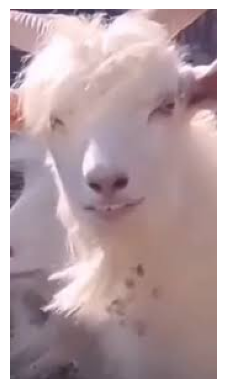

In [58]:
from PIL import Image
from urllib.request import urlopen
import matplotlib.pyplot as plt

url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRoKiOiDcJ4SXJHEa-OKHbMpa6ekiCpxM0vwmneKs0ercw2WEpKSaKdIXem_nobumi-VgY&usqp=CAU"
image = Image.open(urlopen(url))

plt.imshow(image)
plt.axis('off')
print("Это дядя")
plt.show()